In [1]:
# LSTM 臺大資訊大樓 (有雨)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    if line1[-1] == 'T':
        for i in range(0, 24):
            rain.append(float(line1List[i+1]))
        count+=1
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2List = line2.split(',')
            if line2List[0] == '臺大資訊大樓':
                for i in range(0, 24):
                    ntu.append(int(line2List[i+1]))
                break
        f2.close()
f1.close()
print(count)

95


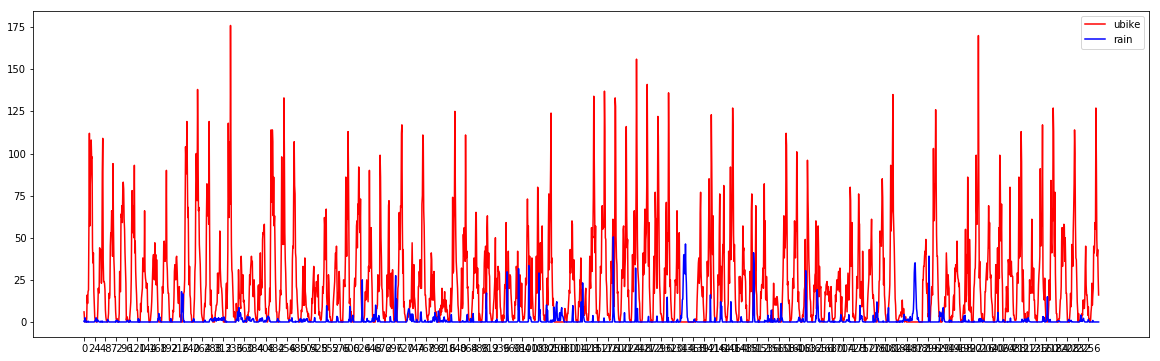

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,2280,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [3]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

             ubike
count  2280.000000
mean     23.261842
std      26.791368
min       0.000000
25%       3.000000
50%      15.000000
75%      33.000000
max     176.000000
              rain
count  2280.000000
mean      1.080570
std       4.040805
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max      50.500000


In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_ubike)
df_ubike_std = sc.transform(df_ubike)

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_rain)
df_rain_std = sc.transform(df_rain)

In [5]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['Rain','X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain_std[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain_std[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'Rain'] = np.asscalar(df_rain_std[i+2])
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'Rain'] = np.asscalar(df_rain_std[i+3])
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'Rain'] = np.asscalar(df_rain_std[i+4])
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'Rain'] = np.asscalar(df_rain_std[i+5])
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])

In [6]:
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
mse_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_rnn[:1824], y_rnn[:1824], epochs=100, batch_size=5, verbose=1)
    
    mse = model.evaluate(X_rnn[1824:],y_rnn[1824:])
    model.save_weights('with_rain_input_model_' + str(name_count) + '_rain_day.h5') # save weights
    print(mse)
    print('-------------------------------------------------')
    mse_list.append(mse)

Epoch 1/100
1824/1824 [==============================] - 1s 656us/step - loss: 0.1080
Epoch 2/100
1824/1824 [==============================] - 1s 330us/step - loss: 0.0488
Epoch 3/100
1824/1824 [==============================] - 1s 361us/step - loss: 0.0387
Epoch 4/100
1824/1824 [==============================] - 1s 336us/step - loss: 0.0314
Epoch 5/100
1824/1824 [==============================] - 1s 340us/step - loss: 0.0296
Epoch 6/100
1824/1824 [==============================] - 1s 339us/step - loss: 0.0295
Epoch 7/100
1824/1824 [==============================] - 1s 347us/step - loss: 0.0292
Epoch 8/100
1824/1824 [==============================] - 1s 336us/step - loss: 0.0289
Epoch 9/100
1824/1824 [==============================] - 1s 337us/step - loss: 0.0293
Epoch 10/100
1824/1824 [==============================] - 1s 332us/step - loss: 0.0289
Epoch 11/100
1824/1824 [==============================] - 1s 333us/step - loss: 0.0289
Epoch 12/100
1824/1824 [============================

Epoch 88/100
1824/1824 [==============================] - 1s 350us/step - loss: 0.0280
Epoch 89/100
1824/1824 [==============================] - 1s 346us/step - loss: 0.0279
Epoch 90/100
1824/1824 [==============================] - 1s 352us/step - loss: 0.0279
Epoch 91/100
1824/1824 [==============================] - 1s 348us/step - loss: 0.0278
Epoch 92/100
1824/1824 [==============================] - 1s 349us/step - loss: 0.0279
Epoch 93/100
1824/1824 [==============================] - 1s 351us/step - loss: 0.0279
Epoch 94/100
1824/1824 [==============================] - 1s 349us/step - loss: 0.0279
Epoch 95/100
1824/1824 [==============================] - 1s 351us/step - loss: 0.0278
Epoch 96/100
1824/1824 [==============================] - 1s 350us/step - loss: 0.0279
Epoch 97/100
1824/1824 [==============================] - 1s 349us/step - loss: 0.0278
Epoch 98/100
1824/1824 [==============================] - 1s 349us/step - loss: 0.0278
Epoch 99/100
1824/1824 [===================

Epoch 73/100
1824/1824 [==============================] - 1s 508us/step - loss: 0.0271
Epoch 74/100
1824/1824 [==============================] - 1s 509us/step - loss: 0.0269
Epoch 75/100
1824/1824 [==============================] - 1s 518us/step - loss: 0.0270
Epoch 76/100
1824/1824 [==============================] - 1s 489us/step - loss: 0.0269
Epoch 77/100
1824/1824 [==============================] - 1s 527us/step - loss: 0.0270
Epoch 78/100
1824/1824 [==============================] - 1s 524us/step - loss: 0.0269
Epoch 79/100
1824/1824 [==============================] - 1s 499us/step - loss: 0.0270
Epoch 80/100
1824/1824 [==============================] - 1s 507us/step - loss: 0.0269
Epoch 81/100
1824/1824 [==============================] - 1s 508us/step - loss: 0.0269
Epoch 82/100
1824/1824 [==============================] - 1s 497us/step - loss: 0.0268
Epoch 83/100
1824/1824 [==============================] - 1s 512us/step - loss: 0.0268
Epoch 84/100
1824/1824 [===================

Epoch 58/100
1824/1824 [==============================] - 1s 517us/step - loss: 0.0253
Epoch 59/100
1824/1824 [==============================] - 1s 515us/step - loss: 0.0253
Epoch 60/100
1824/1824 [==============================] - 1s 514us/step - loss: 0.0252
Epoch 61/100
1824/1824 [==============================] - 1s 515us/step - loss: 0.0251
Epoch 62/100
1824/1824 [==============================] - 1s 517us/step - loss: 0.0252
Epoch 63/100
1824/1824 [==============================] - 1s 517us/step - loss: 0.0252
Epoch 64/100
1824/1824 [==============================] - 1s 516us/step - loss: 0.0251
Epoch 65/100
1824/1824 [==============================] - 1s 516us/step - loss: 0.0252
Epoch 66/100
1824/1824 [==============================] - 1s 521us/step - loss: 0.0250
Epoch 67/100
1824/1824 [==============================] - 1s 521us/step - loss: 0.0249
Epoch 68/100
1824/1824 [==============================] - 1s 517us/step - loss: 0.0250
Epoch 69/100
1824/1824 [===================

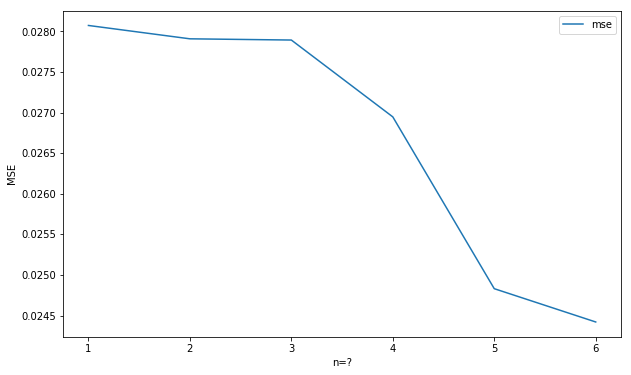

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.plot(range(1,7),mse_list,label='mse')
plt.legend()

In [16]:
# LSTM 臺大資訊大樓 (沒雨)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    if line1[-1] == 'F':
        for i in range(0, 24):
            rain.append(float(line1List[i+1]))
        count+=1
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2List = line2.split(',')
            if line2List[0] == '臺大資訊大樓':
                for i in range(0, 24):
                    ntu.append(int(line2List[i+1]))
                break
        f2.close()
f1.close()
print(count)

269


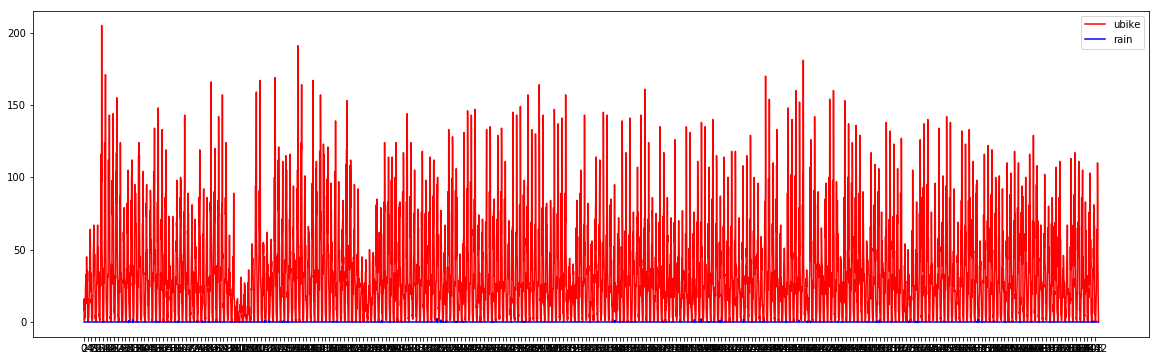

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,6456,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [18]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

             ubike
count  6456.000000
mean     32.342472
std      31.464708
min       0.000000
25%       5.000000
50%      25.000000
75%      49.000000
max     205.000000
              rain
count  6456.000000
mean      0.008597
std       0.087031
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.400000


In [19]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_ubike)
df_ubike_std = sc.transform(df_ubike)

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_rain)
df_rain_std = sc.transform(df_rain)

In [20]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['Rain','X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain_std[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain_std[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'Rain'] = np.asscalar(df_rain_std[i+2])
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'Rain'] = np.asscalar(df_rain_std[i+3])
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'Rain'] = np.asscalar(df_rain_std[i+4])
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'Rain'] = np.asscalar(df_rain_std[i+5])
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])

In [21]:
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

In [23]:
mse_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_rnn[:5160], y_rnn[:5160], epochs=100, batch_size=5, verbose=1)
    
    mse = model.evaluate(X_rnn[5160:],y_rnn[5160:])
    model.save_weights('with_rain_input_model_' + str(name_count) + '_no_rain_day.h5') # save weights
    print(mse)
    print('-------------------------------------------------')
    mse_list.append(mse)

Epoch 1/100
5160/5160 [==============================] - 3s 486us/step - loss: 0.0690
Epoch 2/100
5160/5160 [==============================] - 1s 289us/step - loss: 0.0296
Epoch 3/100
5160/5160 [==============================] - 1s 289us/step - loss: 0.0286
Epoch 4/100
5160/5160 [==============================] - 2s 291us/step - loss: 0.0282
Epoch 5/100
5160/5160 [==============================] - 1s 291us/step - loss: 0.0280
Epoch 6/100
5160/5160 [==============================] - 1s 290us/step - loss: 0.0276
Epoch 7/100
5160/5160 [==============================] - 1s 290us/step - loss: 0.0275
Epoch 8/100
5160/5160 [==============================] - 1s 290us/step - loss: 0.0274
Epoch 9/100
5160/5160 [==============================] - 1s 290us/step - loss: 0.0274
Epoch 10/100
5160/5160 [==============================] - 2s 291us/step - loss: 0.0273
Epoch 11/100
5160/5160 [==============================] - 1s 291us/step - loss: 0.0273
Epoch 12/100
5160/5160 [============================

5160/5160 [==============================] - 1s 288us/step - loss: 0.0266
Epoch 96/100
5160/5160 [==============================] - 1s 289us/step - loss: 0.0266
Epoch 97/100
5160/5160 [==============================] - 1s 289us/step - loss: 0.0265
Epoch 98/100
5160/5160 [==============================] - 1s 289us/step - loss: 0.0265
Epoch 99/100
5160/5160 [==============================] - 1s 289us/step - loss: 0.0265
Epoch 100/100
1295/1295 [==============================] - 0s 158us/step
0.025254641611373564
-------------------------------------------------
Epoch 1/100
5160/5160 [==============================] - 3s 514us/step - loss: 0.0513
Epoch 2/100
5160/5160 [==============================] - 2s 339us/step - loss: 0.0320
Epoch 3/100
5160/5160 [==============================] - 2s 338us/step - loss: 0.0296
Epoch 4/100
5160/5160 [==============================] - 2s 338us/step - loss: 0.0282
Epoch 5/100
5160/5160 [==============================] - 2s 340us/step - loss: 0.0276
Epoc

5160/5160 [==============================] - 2s 383us/step - loss: 0.0241
Epoch 80/100
5160/5160 [==============================] - 2s 381us/step - loss: 0.0240
Epoch 81/100
5160/5160 [==============================] - 2s 382us/step - loss: 0.0239
Epoch 82/100
5160/5160 [==============================] - 2s 382us/step - loss: 0.0240
Epoch 83/100
5160/5160 [==============================] - 2s 381us/step - loss: 0.0239
Epoch 84/100
5160/5160 [==============================] - 2s 382us/step - loss: 0.0239
Epoch 85/100
5160/5160 [==============================] - 2s 381us/step - loss: 0.0239
Epoch 86/100
5160/5160 [==============================] - 2s 384us/step - loss: 0.0238
Epoch 87/100
5160/5160 [==============================] - 2s 382us/step - loss: 0.0238
Epoch 88/100
5160/5160 [==============================] - 2s 382us/step - loss: 0.0238
Epoch 89/100
5160/5160 [==============================] - 2s 383us/step - loss: 0.0238
Epoch 90/100
5160/5160 [==============================] 

Epoch 72/100
5160/5160 [==============================] - 3s 494us/step - loss: 0.0211
Epoch 73/100
5160/5160 [==============================] - 3s 500us/step - loss: 0.0210
Epoch 74/100
5160/5160 [==============================] - 3s 500us/step - loss: 0.0211
Epoch 75/100
5160/5160 [==============================] - 3s 500us/step - loss: 0.0210
Epoch 76/100
5160/5160 [==============================] - 3s 508us/step - loss: 0.0210
Epoch 77/100
5160/5160 [==============================] - 3s 509us/step - loss: 0.0210
Epoch 78/100
5160/5160 [==============================] - 3s 521us/step - loss: 0.0210
Epoch 79/100
5160/5160 [==============================] - 3s 516us/step - loss: 0.0210
Epoch 80/100
5160/5160 [==============================] - 3s 514us/step - loss: 0.0209
Epoch 81/100
5160/5160 [==============================] - 3s 513us/step - loss: 0.0209
Epoch 82/100
5160/5160 [==============================] - 3s 518us/step - loss: 0.0208
Epoch 83/100
5160/5160 [===================

5160/5160 [==============================] - 3s 610us/step - loss: 0.0160
Epoch 57/100
5160/5160 [==============================] - 3s 597us/step - loss: 0.0159
Epoch 58/100
5160/5160 [==============================] - 3s 625us/step - loss: 0.0157
Epoch 59/100
5160/5160 [==============================] - 3s 625us/step - loss: 0.0158
Epoch 60/100
5160/5160 [==============================] - 3s 626us/step - loss: 0.0158
Epoch 61/100
5160/5160 [==============================] - 3s 644us/step - loss: 0.0156
Epoch 62/100
5160/5160 [==============================] - 3s 583us/step - loss: 0.0158 0s - loss: 0.0
Epoch 63/100
5160/5160 [==============================] - 3s 630us/step - loss: 0.0156
Epoch 64/100
5160/5160 [==============================] - 3s 635us/step - loss: 0.0156
Epoch 65/100
5160/5160 [==============================] - 3s 635us/step - loss: 0.0154
Epoch 66/100
5160/5160 [==============================] - 3s 655us/step - loss: 0.0154
Epoch 67/100
5160/5160 [=================

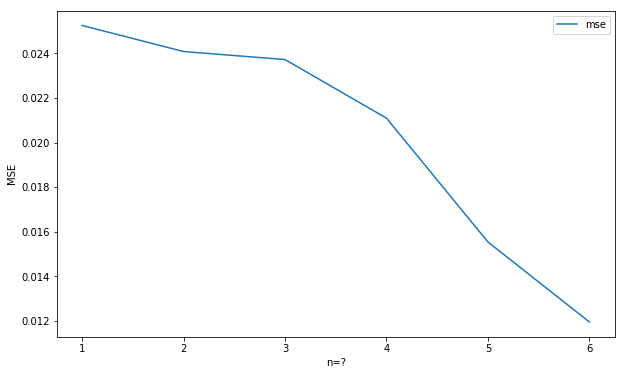

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.plot(range(1,7),mse_list,label='mse')
plt.legend()

In [25]:
# LSTM 臺大資訊大樓 (全)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    for i in range(0, 24):
        rain.append(float(line1List[i+1]))
    count+=1
    f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
    while True:
        line2 = f2.readline().strip()
        if line2 == '':
            break
        line2List = line2.split(',')
        if line2List[0] == '臺大資訊大樓':
            for i in range(0, 24):
                ntu.append(int(line2List[i+1]))
            break
    f2.close()
f1.close()
print(count)

364


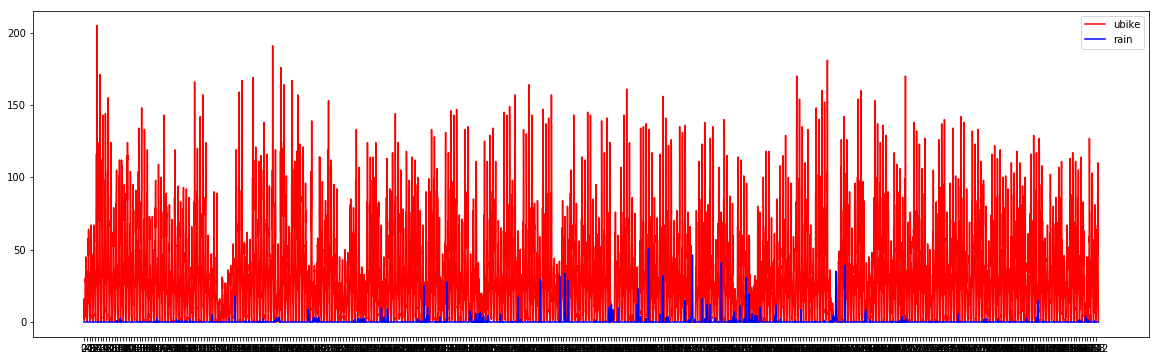

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,8736,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [27]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

             ubike
count  8736.000000
mean     29.972527
std      30.574318
min       0.000000
25%       5.000000
50%      22.000000
75%      46.000000
max     205.000000
              rain
count  8736.000000
mean      0.288370
std       2.118333
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      50.500000


In [28]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_ubike)
df_ubike_std = sc.transform(df_ubike)

sc = MinMaxScaler(feature_range=(-0.9, 0.9))
sc.fit(df_rain)
df_rain_std = sc.transform(df_rain)

In [29]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])
df_rnn3 = pd.DataFrame(columns=['Rain','X1','X2','X3','Y'])
df_rnn4 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','Y'])
df_rnn5 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','Y'])
df_rnn6 = pd.DataFrame(columns=['Rain','X1','X2','X3','X4','X5','X6','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain_std[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike_std[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain_std[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike_std[i+2])

for i in range(len(df_ubike)-3):
    df_rnn3.loc[i,'Rain'] = np.asscalar(df_rain_std[i+2])
    df_rnn3.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn3.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn3.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn3.loc[i,'Y'] = np.asscalar(df_ubike_std[i+3])

for i in range(len(df_ubike)-4):
    df_rnn4.loc[i,'Rain'] = np.asscalar(df_rain_std[i+3])
    df_rnn4.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn4.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn4.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn4.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn4.loc[i,'Y'] = np.asscalar(df_ubike_std[i+4])

for i in range(len(df_ubike)-5):
    df_rnn5.loc[i,'Rain'] = np.asscalar(df_rain_std[i+4])
    df_rnn5.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn5.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn5.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn5.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn5.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn5.loc[i,'Y'] = np.asscalar(df_ubike_std[i+5])

for i in range(len(df_ubike)-6):
    df_rnn6.loc[i,'Rain'] = np.asscalar(df_rain_std[i+5])
    df_rnn6.loc[i,'X1'] = np.asscalar(df_ubike_std[i])
    df_rnn6.loc[i,'X2'] = np.asscalar(df_ubike_std[i+1])
    df_rnn6.loc[i,'X3'] = np.asscalar(df_ubike_std[i+2])
    df_rnn6.loc[i,'X4'] = np.asscalar(df_ubike_std[i+3])
    df_rnn6.loc[i,'X5'] = np.asscalar(df_ubike_std[i+4])
    df_rnn6.loc[i,'X6'] = np.asscalar(df_ubike_std[i+5])
    df_rnn6.loc[i,'Y'] = np.asscalar(df_ubike_std[i+6])

In [30]:
df_list = [df_rnn1,df_rnn2,df_rnn3,df_rnn4,df_rnn5,df_rnn6]

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

In [32]:
mse_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_rnn[:6984], y_rnn[:6984], epochs=100, batch_size=5, verbose=1)
    
    mse = model.evaluate(X_rnn[6984:],y_rnn[6984:])
    model.save_weights('with_rain_input_model_' + str(name_count) + '_all_day.h5') # save weights
    print(mse)
    print('-------------------------------------------------')
    mse_list.append(mse)

Epoch 1/100
6984/6984 [==============================] - 3s 476us/step - loss: 0.0436
Epoch 2/100
6984/6984 [==============================] - 2s 312us/step - loss: 0.0267
Epoch 3/100
6984/6984 [==============================] - 2s 315us/step - loss: 0.0262
Epoch 4/100
6984/6984 [==============================] - 2s 315us/step - loss: 0.0260
Epoch 5/100
6984/6984 [==============================] - 2s 317us/step - loss: 0.0258
Epoch 6/100
6984/6984 [==============================] - 2s 315us/step - loss: 0.0256
Epoch 7/100
6984/6984 [==============================] - 2s 316us/step - loss: 0.0255
Epoch 8/100
6984/6984 [==============================] - 2s 315us/step - loss: 0.0255
Epoch 9/100
6984/6984 [==============================] - 2s 316us/step - loss: 0.0254
Epoch 10/100
6984/6984 [==============================] - 2s 315us/step - loss: 0.0254
Epoch 11/100
6984/6984 [==============================] - 2s 316us/step - loss: 0.0254
Epoch 12/100
6984/6984 [============================

Epoch 88/100
6984/6984 [==============================] - 2s 355us/step - loss: 0.0239
Epoch 89/100
6984/6984 [==============================] - 2s 342us/step - loss: 0.0239
Epoch 90/100
6984/6984 [==============================] - 3s 371us/step - loss: 0.0238
Epoch 91/100
6984/6984 [==============================] - 3s 377us/step - loss: 0.0239
Epoch 92/100
6984/6984 [==============================] - 2s 353us/step - loss: 0.0238
Epoch 93/100
6984/6984 [==============================] - 2s 349us/step - loss: 0.0239
Epoch 94/100
6984/6984 [==============================] - 2s 328us/step - loss: 0.0238
Epoch 95/100
6984/6984 [==============================] - 2s 335us/step - loss: 0.0239
Epoch 96/100
6984/6984 [==============================] - 2s 336us/step - loss: 0.0238
Epoch 97/100
6984/6984 [==============================] - 2s 337us/step - loss: 0.0238
Epoch 98/100
6984/6984 [==============================] - 2s 331us/step - loss: 0.0238
Epoch 99/100
6984/6984 [===================

6984/6984 [==============================] - 3s 420us/step - loss: 0.0203
Epoch 73/100
6984/6984 [==============================] - 3s 420us/step - loss: 0.0204
Epoch 74/100
6984/6984 [==============================] - 3s 420us/step - loss: 0.0203
Epoch 75/100
6984/6984 [==============================] - 3s 420us/step - loss: 0.0204
Epoch 76/100
6984/6984 [==============================] - 3s 420us/step - loss: 0.0203
Epoch 77/100
6984/6984 [==============================] - 3s 424us/step - loss: 0.0203
Epoch 78/100
6984/6984 [==============================] - 3s 427us/step - loss: 0.0203
Epoch 79/100
6984/6984 [==============================] - 3s 419us/step - loss: 0.0203
Epoch 80/100
6984/6984 [==============================] - 3s 420us/step - loss: 0.0202
Epoch 81/100
6984/6984 [==============================] - 3s 429us/step - loss: 0.0202
Epoch 82/100
6984/6984 [==============================] - 4s 533us/step - loss: 0.0202
Epoch 83/100
6984/6984 [==============================] 

6984/6984 [==============================] - 4s 623us/step - loss: 0.0162
Epoch 57/100
6984/6984 [==============================] - 4s 556us/step - loss: 0.0161
Epoch 58/100
6984/6984 [==============================] - 4s 540us/step - loss: 0.0161
Epoch 59/100
6984/6984 [==============================] - 4s 569us/step - loss: 0.0162
Epoch 60/100
6984/6984 [==============================] - 4s 639us/step - loss: 0.0160
Epoch 61/100
6984/6984 [==============================] - 4s 636us/step - loss: 0.0159
Epoch 62/100
6984/6984 [==============================] - 5s 651us/step - loss: 0.0160
Epoch 63/100
6984/6984 [==============================] - 5s 653us/step - loss: 0.0159
Epoch 64/100
6984/6984 [==============================] - 5s 655us/step - loss: 0.0158
Epoch 65/100
6984/6984 [==============================] - 5s 651us/step - loss: 0.0158
Epoch 66/100
6984/6984 [==============================] - 5s 651us/step - loss: 0.0156
Epoch 67/100
6984/6984 [==============================] 

In [33]:
print(mse_list)

[0.02538442968586082, 0.024086700162717273, 0.02302519333846505, 0.01981255126098337, 0.016054853068213668, 0.013693894454857329]


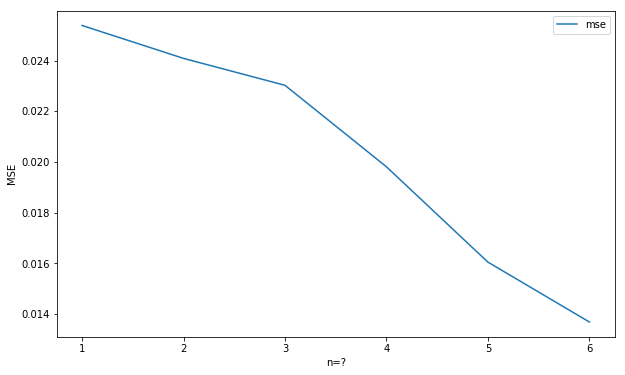

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlabel('n=?')
plt.ylabel('MSE')
plt.plot(range(1,7),mse_list,label='mse')
plt.legend()